# Task 1: Exploratory Data Analysis (EDA)

Q1. Load the Titanic dataset using Python's pandas library.

Q2. Check for missing values.

Q3. Explore data distributions using histograms and box plots.

Q4. Visualize relationships between features and survival using scatter plots and bar plots.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, auc, RocCurveDisplay
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
train = pd.read_csv("Titanic_train.csv")
test = pd.read_csv("Titanic_test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Examine the structure of the Train dataset
print("Training Dataset Shape:", train.shape)
print("\nColumns:", train.columns)
print("\nData Types:\n", train.dtypes)

# Examine the structure of the Test dataset
print("Testing Dataset Shape:", test.shape)
print("\nColumns:", test.columns)
print("\nData Types:\n", test.dtypes)

Training Dataset Shape: (891, 12)

Columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Testing Dataset Shape: (418, 11)

Columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

Data Types:
 PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


However, we can see there is no Survived column in the test data. Evaluation can only be done when we can compare our predicted target with the actual target. So to perform evaluation, we will be splitting training data provided into training and test data. Once it is done, the original training data provided will be used to predict test data output.

In [3]:
# Check null values
total = train.isnull().sum().sort_values(ascending=False)
print("Null Values Before Data Pre-processing: ")
print(total)

Null Values Before Data Pre-processing: 
Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64


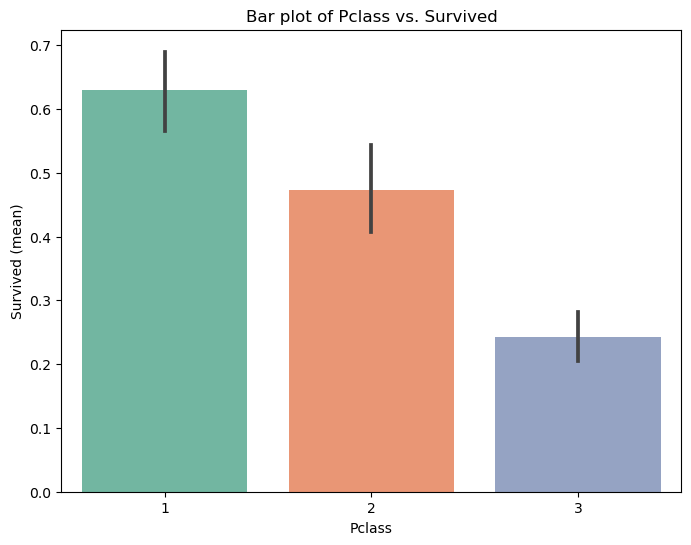

In [4]:
# Bar plot for Pclass vs. Survived
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set2')
plt.title('Bar plot of Pclass vs. Survived')
plt.xlabel('Pclass')
plt.ylabel('Survived (mean)')
plt.show()

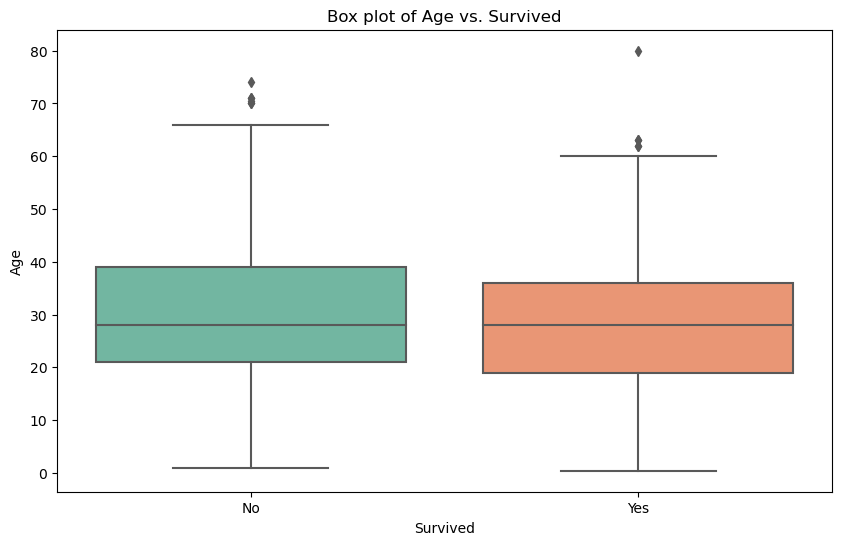

In [5]:
# Box plot of Age vs. Survived
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=train, palette='Set2')
plt.title('Box plot of Age vs. Survived')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

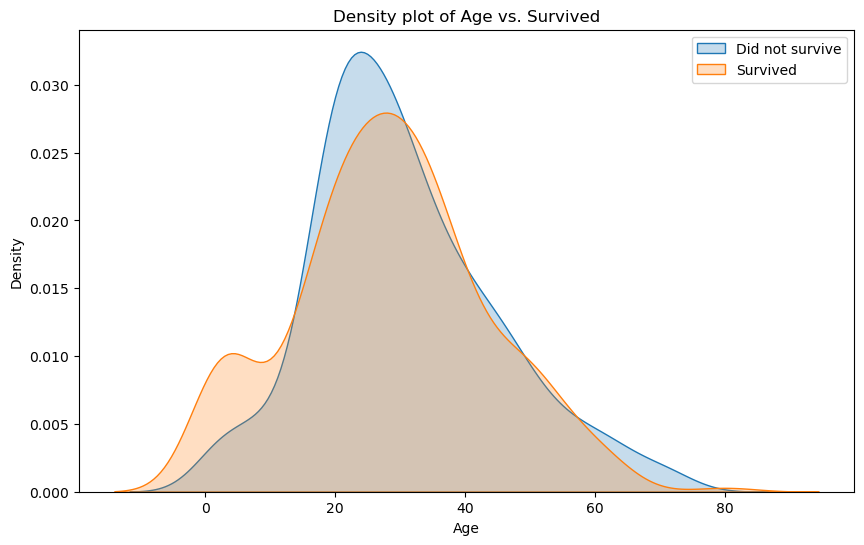

In [6]:
# KDE plot of Age vs. Survived

plt.figure(figsize=(10, 6))
sns.kdeplot(data=train[train['Survived'] == 0]['Age'], label='Did not survive', shade=True)
sns.kdeplot(data=train[train['Survived'] == 1]['Age'], label='Survived', shade=True)
plt.title('Density plot of Age vs. Survived')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

# Task 2: Data Preprocessing:

Q1. Impute missing values.

Q2. Encode categorical variables using one-hot encoding or label encoding. 

Q3. If needed you can apply more preprocessing methods on the given dataset.

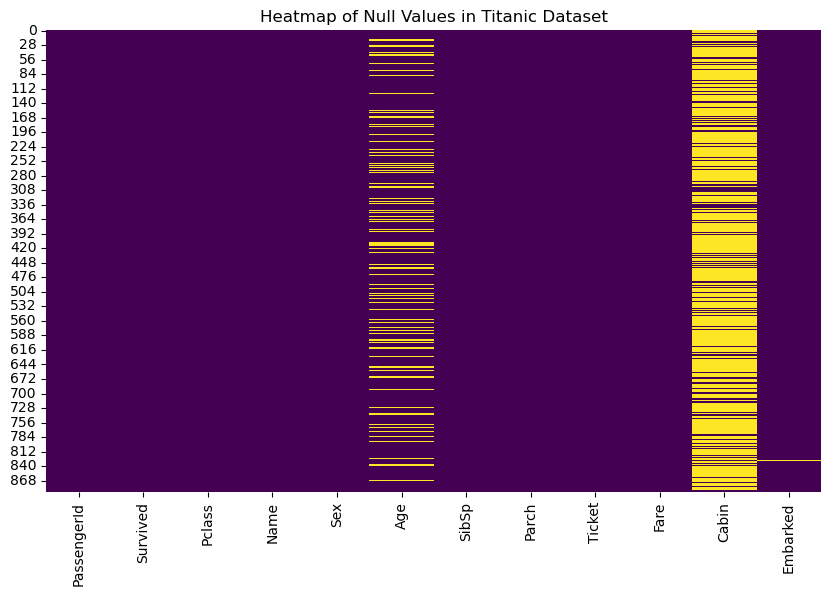

In [7]:
# Create a heatmap of null values
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values in Titanic Dataset')
plt.show()

In [8]:
# Defining age imputation function
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

# Applying it on 'Age' column
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
#train["Age"] = train["Age"].astype(int) // If we want to convert this column to int.

In [9]:
# Dropping the two rows in the 'Embarked' column
train.dropna(inplace=True)

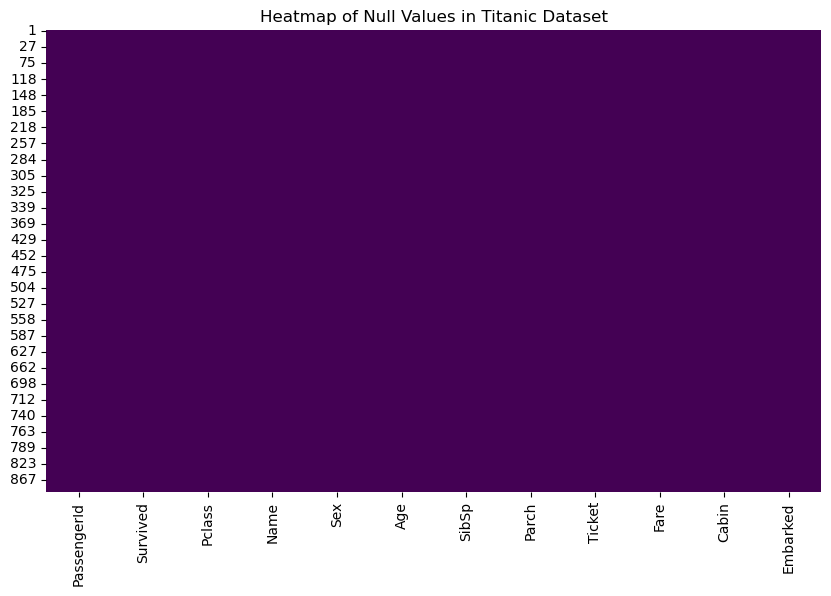

In [10]:
# Create a heatmap of null values again
plt.figure(figsize=(10, 6))
sns.heatmap(train.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap of Null Values in Titanic Dataset')
plt.show()

We can see that there are no more null values in the dataset.

Additionally, we can drop the 'PassengerId', 'Name','Ticket' and 'Cabin' columns as they are not relevant.

In [11]:
train.drop(['PassengerId', 'Name','Ticket','Cabin'],axis='columns',inplace=True)
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
1,1,1,female,38.0,1,0,71.2833,C
3,1,1,female,35.0,1,0,53.1000,S
6,0,1,male,54.0,0,0,51.8625,S
10,1,3,female,4.0,1,1,16.7000,S
11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S
872,0,1,male,33.0,0,0,5.0000,S
879,1,1,female,56.0,0,1,83.1583,C
887,1,1,female,19.0,0,0,30.0000,S


LightGBM, like many other gradient boosting frameworks, can handle categorical features directly. In fact, using categorical features in their original form (without numerical conversion) can sometimes improve model performance, especially when those features have a meaningful categorical relationship. Hence, we do not need to encode categorical columns.

In [12]:
# Checking the datatypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  202 non-null    int64  
 1   Pclass    202 non-null    int64  
 2   Sex       202 non-null    object 
 3   Age       202 non-null    float64
 4   SibSp     202 non-null    int64  
 5   Parch     202 non-null    int64  
 6   Fare      202 non-null    float64
 7   Embarked  202 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 14.2+ KB


In [13]:
# Split into features (X) and target (y)
X = train.drop('Survived', axis=1)
y = train['Survived']

In [14]:
# Convert categorical columns to 'category' dtype in pandas
categorical_columns = ['Sex', 'Embarked']
X[categorical_columns] = X[categorical_columns].astype('category')

# Task 3: Building Predictive Models:

Q1. Split the preprocessed dataset into training and testing sets.

Q2. Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.

Q3. Build predictive models using LightGBM and XGBoost algorithms.

Q4. Train the models on the training set and evaluate their performance on the testing set.

Q5. Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [15]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Building LightGBM model

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train, categorical_feature=categorical_columns)
test_data = lgb.Dataset(X_test, label=y_test, categorical_feature=categorical_columns, reference=train_data)

# Define parameters for LightGBM
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'binary_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1 ,
    'early_stopping_rounds': 10
}

# Train the model
num_round = 100
lgb_model = lgb.train(params, train_data, num_round, valid_sets=[test_data])

In [17]:
# Make predictions on test data

y_pred_proba = lgb_model.predict(X_test)
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

In [18]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8293
Precision: 0.9062
Recall: 0.8788
F1-score: 0.8923
ROC-AUC: 0.9091


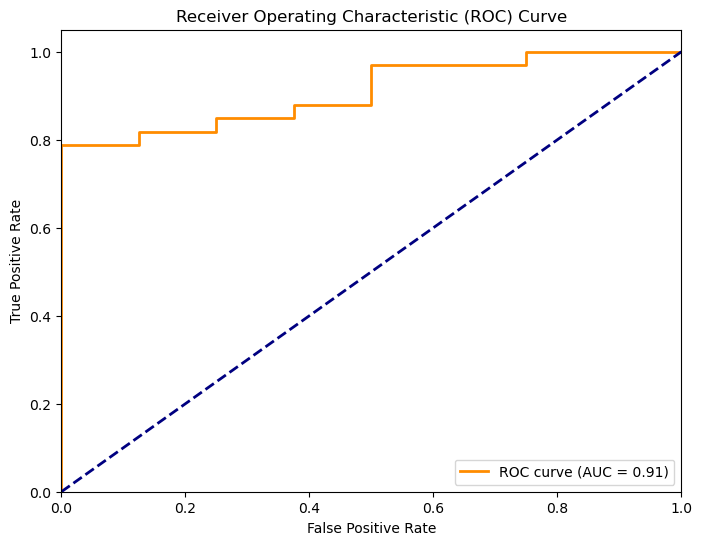

In [19]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Optimizing model performance using cross-validation

In [20]:
# Define the base LightGBM model
base_model = lgb.LGBMClassifier(random_state=42,verbose= -100)

# Check the default parameters
base_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 42,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'verbose': -100}

In [21]:
param_grid = {
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

random_search = RandomizedSearchCV(estimator=base_model, param_distributions=param_grid, n_iter=100,
                                   cv=5, scoring='accuracy', random_state=42, verbose=True)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=LGBMClassifier(random_state=42, verbose=-100),
                   n_iter=100,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300],
                                        'reg_alpha': [0.0, 0.1, 0.5],
                                        'reg_lambda': [0.0, 0.1, 0.5],
                                        'subsample': [0.8, 0.9, 1.0]},
                   random_state=42, scoring='accuracy', verbose=True)

In [22]:
# Evaluate Results
print("Best Parameters found: ", random_search.best_params_)
print("Best Cross-validation accuracy: {:.4f}".format(random_search.best_score_))

Best Parameters found:  {'subsample': 1.0, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'colsample_bytree': 1.0}
Best Cross-validation accuracy: 0.7140


In [23]:
# Use the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
optimized_model = lgb.LGBMClassifier(**best_params, random_state=42,verbose= -100)

optimized_model.fit(X_train, y_train)

LGBMClassifier(max_depth=6, n_estimators=300, random_state=42, reg_alpha=0.5,
               reg_lambda=0.5, verbose=-100)

In [24]:
# Make predictions
y_pred = optimized_model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8537
Precision: 0.9355
Recall: 0.8788
F1-score: 0.9062
ROC-AUC: 0.9091


We can see that the model accuracy has increased from 0.8293 to 0.8537 after optimizing it using cross-validation.

#### Building XGBoost model

In [26]:
# Specify categorical columns
categorical_columns = ['Sex', 'Embarked']

# Create DMatrix for XGBoost with enable_categorical=True
dtrain = xgb.DMatrix(X_train, label=y_train, enable_categorical=categorical_columns)
dtest = xgb.DMatrix(X_test, label=y_test, enable_categorical=categorical_columns)

# Define and Train the XGBoost Model

# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',  # Or 'logloss' for binary classification
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'verbosity': 0
}

# Train the model
num_round = 100
xgb_model = xgb.train(params,
                      dtrain,
                      num_boost_round=num_round,
                      evals=[(dtest, 'validation')],
                      early_stopping_rounds=10,
                      verbose_eval=10)

[0]	validation-error:0.19512
[10]	validation-error:0.17073
[20]	validation-error:0.14634
[25]	validation-error:0.12195


In [27]:
# Make predictions
y_pred_proba = xgb_model.predict(dtest)

# Convert probabilities to binary predictions
y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]

In [28]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8780
Precision: 0.8684
Recall: 1.0000
F1-score: 0.9296
ROC-AUC: 0.9129


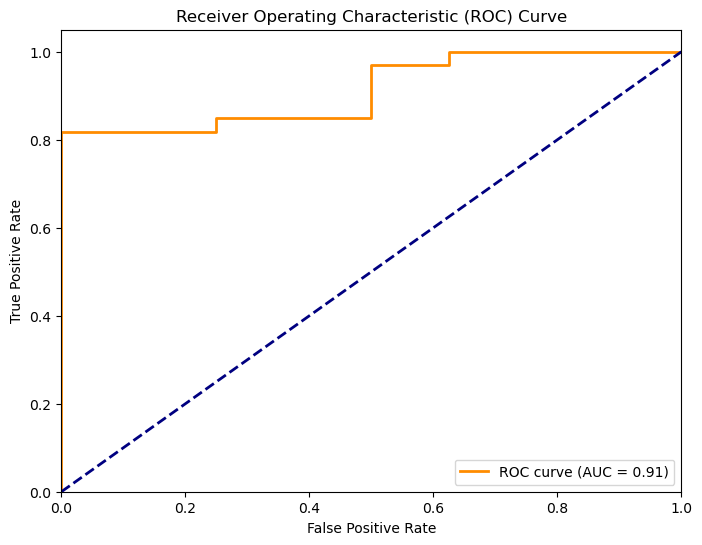

In [29]:
# Compute ROC curve and ROC area

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Optimizing model performance using cross-validation

In [31]:
# Define XGBoost Model

params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'eval_metric': 'logloss',        # Evaluation metric
    'eta': 0.1,                      # Learning rate
    'max_depth': 4,                  # Maximum depth of a tree
    'subsample': 0.8,                # Subsample ratio of the training instances
    'colsample_bytree': 0.8,         # Subsample ratio of columns when constructing each tree
    'seed': 42                       # Random seed for reproducibility
}


xgb_model = xgb.XGBClassifier(**params, verbose= -100, enable_categorical=True)  # Enable categorical support

In [32]:
# Set Up Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [33]:
# Define Parameter Distributions for RandomizedSearchCV

param_dist = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_child_weight': np.arange(1, 11, 1),
    'gamma': np.arange(0.0, 1.1, 0.1), 
    'subsample': np.arange(0.6, 1.0, 0.1),
    'colsample_bytree': np.arange(0.6, 1.0, 0.1),
    'reg_alpha': np.arange(0.0, 1.1, 0.1),
    'reg_lambda': np.arange(0.0, 1.1, 0.1)
}

In [34]:
# Perform RandomizedSearchCV

random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_dist, 
                                   scoring='accuracy', cv=cv, n_iter=100, verbose=True, 
                                   random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=0.8, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=True, eta=0.1,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=No...
                   param_distributions={'colsample_bytree': array([0.6, 0.7, 0.8, 0.9]),
                                        'gamma': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'max_depth': [3, 4, 5, 6, 7, 8],
                                        'min_child_weight': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'reg_alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'reg_lambda': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                                        'subsample': array([0.6, 0.7, 0.8, 0.9])},
                   random_state=42, scoring='accuracy', verbose=True)

In [35]:
# Evaluate Results
print("Best Parameters found: ", random_search.best_params_)
print("Best Cross-validation accuracy: {:.4f}".format(random_search.best_score_))

Best Parameters found:  {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.5, 'min_child_weight': 2, 'max_depth': 3, 'gamma': 0.9, 'colsample_bytree': 0.8999999999999999}
Best Cross-validation accuracy: 0.7636


In [36]:
# Use the best parameters from RandomizedSearchCV
best_params = random_search.best_params_
optimized_model = xgb.XGBClassifier(**best_params, random_state=42,verbose= -100, enable_categorical=True)

optimized_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8999999999999999, device=None,
              early_stopping_rounds=None, enable_categorical=True,
              eval_metric=None, feature_types=None, gamma=0.9, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=2, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [37]:
# Predictions on the test set
y_pred = optimized_model.predict(X_test)

In [38]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.8537
Precision: 0.9355
Recall: 0.8788
F1-score: 0.9062
ROC-AUC: 0.9129


# Task 4: Comparative Analysis

Q1. Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

Q2. Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

#### LightGBM Model

1. Before Optimization:
    1. Accuracy: 0.8293
    2. Precision: 0.9062
    3. Recall: 0.8788
    4. F1-score: 0.8923
    5. ROC-AUC: 0.9091
2. After Optimization:
    1. Accuracy: 0.8537
    2. Precision: 0.9355
    3. Recall: 0.8788
    4. F1-score: 0.9062
    5. ROC-AUC: 0.9091

##### Analysis

1. Accuracy Improvement: The accuracy of the model increased from 0.8293 to 0.8537 after optimization. This indicates that the model is making more correct predictions overall on the test set.
2. Precision Improvement: Precision measures the proportion of correctly predicted positive instances out of all predicted positives. It increased significantly from 0.9062 to 0.9355 after optimization. This means that the optimized model is better at avoiding false positives, which is crucial in applications where precision is important.
3. Recall (Sensitivity) Consistency: Recall remained the same at 0.8788 before and after optimization. Recall measures the proportion of actual positives that are correctly identified by the model. The consistency in recall suggests that the optimized model did not sacrifice its ability to correctly identify positive instances.
4. F1-score Improvement: F1-score, which balances precision and recall, improved from 0.8923 to 0.9062. This improvement indicates that the optimized model achieves better overall performance in terms of both precision and recall.
5. ROC-AUC Consistency: ROC-AUC measures the model's ability to distinguish between classes. It remained consistent at 0.9091 before and after optimization, indicating that the optimized model maintains a good balance between true positive rate and false positive rate.

##### Conclusion

1. The optimization of LightGBM model led to noticeable improvements in accuracy, precision, and F1-score, while maintaining a consistent ROC-AUC score. This suggests that the hyperparameter tuning process successfully enhanced the model's ability to make accurate predictions, particularly in terms of precision, without compromising its ability to correctly identify positive instances (recall). 
2. Overall, these improvements demonstrate the effectiveness of the optimization process in enhancing the performance of the model on the classification task.


#### XGBoost Model

1. Before Optimization:
    1. Accuracy: 0.8780
    2. Precision: 0.8684
    3. Recall: 1.0000
    4. F1-score: 0.9296
    5. ROC-AUC: 0.9129
2. After Optimization:
    1. Accuracy: 0.8537
    2. Precision: 0.9355
    3. Recall: 0.8788
    4. F1-score: 0.9062
    5. ROC-AUC: 0.9129

##### Analysis

1. Accuracy Decrease: The accuracy decreased slightly from 0.8780 before optimization to 0.8537 after optimization. This indicates that the optimized model is making slightly fewer correct predictions overall compared to the unoptimized model.
2. Precision Improvement: Precision increased notably from 0.8684 to 0.9355 after optimization. This improvement suggests that the optimized model is better at avoiding false positives, which is important in scenarios where precision is crucial.
3. Recall Decrease: Recall decreased from 1.0000 before optimization to 0.8788 after optimization. This means that the optimized model identifies fewer of the actual positive instances compared to the unoptimized model. However, recall is still relatively high, indicating that the optimized model retains good sensitivity.
4. F1-score Decrease: F1-score decreased from 0.9296 before optimization to 0.9062 after optimization. F1-score combines precision and recall into a single metric, so the decrease indicates a slight trade-off between precision and recall in the optimized model.
5. ROC-AUC Consistency: ROC-AUC remained consistent at 0.9129 before and after optimization. ROC-AUC measures the model's ability to distinguish between classes, and the consistency suggests that the optimized model maintains good performance in this regard.

##### Conclusion

1. The optimization of XGBoost model led to improvements in precision while experiencing slight decreases in accuracy, recall, and F1-score. The consistent ROC-AUC score suggests that the optimized model maintains its ability to distinguish between classes effectively.
2. The decrease in accuracy, recall, and F1-score may indicate a shift in the model's bias towards precision, meaning it is more conservative in predicting positive instances (higher precision but lower recall). This trade-off could be acceptable depending on the specific requirements of the application, such as prioritizing precision over recall. 
3. Further fine-tuning or adjusting the optimization parameters might help strike a better balance depending on the specific goals and constraints of the project.